In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

In [3]:
# loss level
L = 0.5
# probability of default
p = 0.01

In [4]:
D = np.random.poisson(p * T, I)
# default can only happen once
D = np.where(D>1, 1, D)

# without default value of asset today is discounted average
np.exp(-r * T) * np.sum(ST) / I

99.960127113666616

In [5]:
# credit value at risk is discounted expected loss
CVaR = np.exp(-r * T) * np.sum(L * D * ST) / I
CVaR

0.49497754597678789

In [6]:
S0_CVA = np.exp(-r * T) * np.sum((1 - L * D) * ST) / I
S0_CVA

99.465149567689807

In [7]:
S0_adj = S0 - CVaR
S0_adj

99.505022454023205

In [8]:
# number of losses
np.count_nonzero(L*D*ST)

1002

(0.0, 175)

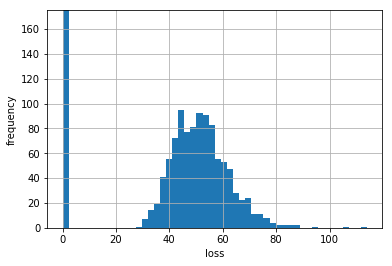

In [9]:
plt.hist(L*D*ST,bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)

In [10]:
# now try with call options
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.412679383381066

In [11]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D *hT)
CVaR

0.048126045133622869

In [12]:
C0_CVA = np.exp(-r * T) * 1/I * np.sum((1 - L * D) *hT)
C0_CVA

10.364553338247443

In [13]:
np.count_nonzero(L * D * hT) # number of losses

542

In [14]:
np.count_nonzero(D) # number of defaults

1002

In [15]:
I - np.count_nonzero(hT) # zero payoff

44030

(0.0, 350)

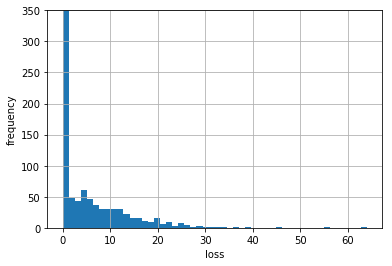

In [16]:
# distribution is different to index because there's no loss if the default happens whilst the option is OTM

plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)